In [6]:
# 1：ライブラリのインポート--------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions

In [30]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200, 2)
y_xor=np.logical_xor(X_xor[:, 0], X_xor[:, 1] > 0)
y_xor=np.where(y_xor, 1, 0)
pd.DataFrame(y_xor)

,0
0,0
1,0
2,1
3,1
4,0
...,...
195,1
196,1
197,1
198,0


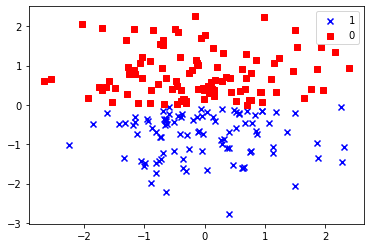

In [58]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c="b", marker="x", label="1")
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c="r", marker="s", label="0")
plt.legend(loc="best")
plt.show()

In [60]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [63]:
# 5：機械学習で分類する---------------------------------------------------
clf_result=linear_model.SGDClassifier(loss="hinge")
clf_result.fit(X_std, z)

SGDClassifier()

In [70]:
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.99
正解率の標準偏差 =  0.020000000000000018


In [79]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, test_size=0.1, random_state=0)
clf_result.fit(X_train, y_train)
#正答率を求める
pre=clf_result.predict(X_test)
# clf_result.score(X_test, y_test)
ac_score=metrics.accuracy_score(y_test, pre)
print("正答率 = ",ac_score)

正答率 =  0.95


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


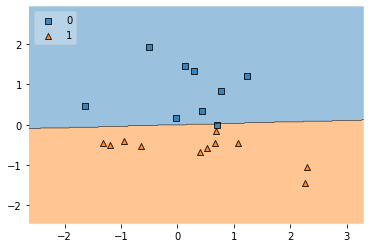

In [110]:
#plotする
X_train_plot=np.vstack(X_train)
y_train_plot=np.hstack(y_train)
X_test_plot=X_test
y_test_plot=y_test
# plot_decision_regions(X_train_plot, y_train_plot, clf=clf_result, res=0.01, legend=2)
plot_decision_regions(X_test_plot, y_test_plot, clf=clf_result, res=0.01, legend=2)

In [ ]:
# 上記をカーネル近似で実装

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

In [116]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200, 2)
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor, 1, 0)
pd.DataFrame(y_xor)

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


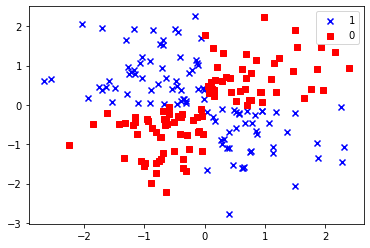

In [117]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c="b", marker="x", label="1")
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c="r", marker="s", label="0")
plt.legend(loc="best")
plt.show()

In [118]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [142]:
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
X_std = rbf_feature.fit_transform(X_std)
print("X_stdの大きさ ",pd.DataFrame(X_std).shape)
# pd.DataFrame(X_std).to_clipboard() #これでクリップボードに保持できるのでエクセルに貼れる

X_stdの大きさ  (200, 100)


In [144]:
# 6：機械学習で分類する---------------------------------------------------
clf_result = linear_model.SGDClassifier(loss="hinge")

In [148]:
# 7：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.445
正解率の標準偏差 =  0.09069178573608527


In [162]:
# 8：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_std, z, test_size=0.1, random_state=0)
clf_result.fit(X_train, y_train)
#正答率を求める
# clf_result.score(X_test, y_test)
pre = clf_result.predict(X_test)
ac_score=metrics.accuracy_score(y_test, pre)
print("正答率 = ",ac_score)

正答率 =  0.4


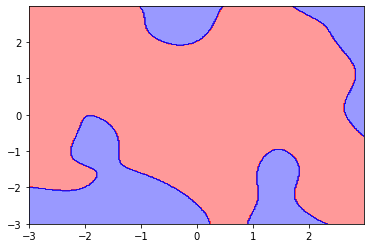

In [177]:
# 解説 9：Plotする
x1_min, x1_max, x2_min, x2_max=-3, 3, -3, 3
resolution=0.02
xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
X=(np.array([xx1.ravel(), xx2.ravel()]).T)
plot_z=clf_result.predict(rbf_feature.fit_transform(X))
colors=('red','blue')
colors=('red','blue')
cmap=ListedColormap(colors[:len(np.unique(plot_z))])
plot_z=plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2, plot_z, alpha=0.4, cmap=cmap)